In [15]:
import os, sys
sys.path.append("../")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import gridspec
import numpy as np
import pandas as pd
from tqdm import *

from grf.units import *
from grf.pk_interp import PowerSpectrumGridInterpolator
from grf.grf import FIRAS

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [17]:
# Location of outputs of cluster runs
outputs_dir = "/Users/smsharma/chi2_arys/"

# Where to save plots
plots_dir = "../paper/draft-letter/plots/"

In [18]:
# Load an instance of FIRAS class with nonlinear matter power spectrum
firas = FIRAS(PowerSpectrumGridInterpolator("nonlin_matter_bj"))

../grf/grf.py:633: FutureWarning: read_table is deprecated, use read_csv instead.
  names=['freq', 'I', 'residual', 'uncert', 'poles'])


## Plasma mass plot (Fig. 2)

In [19]:
def as_si(x, ndp, dolla=0):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    if float(m) == 1.:
        s = r'10^{{{e:d}}}'.format(m=m, e=int(e))
    else:
        s = r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))
    if dolla:
        return '$' + s + '$'
    else:
        return s

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


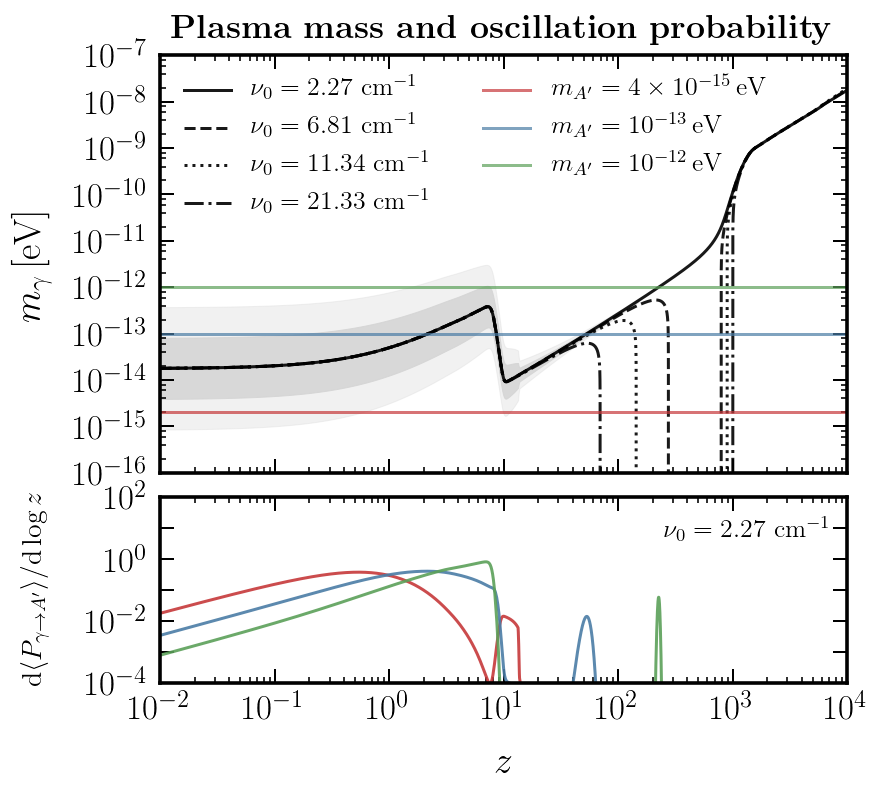

In [20]:
fig = plt.figure(figsize=(8 / 1.3, 7.5 / 1.3)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[2.25, 1], hspace=0.08) 

# Top plot
ax0 = plt.subplot(gs[0])

## Frequency bins to plot
i_freq_ary = [0, 10, 20, -1]

z_ary_plot = np.logspace(-2, 4, 30000)

ls_list = ['-','--',':','-.']

## Plot central values
for i_en_freq_ry, i_freq in enumerate(i_freq_ary):
    m_A_sq = firas.m_A_sq(z_ary_plot, firas.omega_FIRAS[i_freq] * (1 + z_ary_plot))
    m_A_sq[m_A_sq < 0] = 0
    if i_freq == -1:
        ax0.plot(z_ary_plot[z_ary_plot < 1600], np.sqrt(m_A_sq)[z_ary_plot < 1600] / eV , label=r"$\nu_0 = "  + str(firas.df['freq'].values[i_freq]) + "\,\,\mathrm{cm}^{-1}$", ls=ls_list[i_en_freq_ry], color='k', lw=1.5)
    else:
        ax0.plot(z_ary_plot, np.sqrt(m_A_sq) / eV , label=r"$\nu_0 = "  + str(firas.df['freq'].values[i_freq]) + "\,\,\mathrm{cm}^{-1}$", ls=ls_list[i_en_freq_ry], color='k', lw=1.5)

## For the first frequency bin, plot 1- and 2-sigma containment regions

i_freq = 0

z_ary_fluc, dP_dz_ary, P_tot, sigma_sq_ary = firas.P_tot_perturb([firas.omega_FIRAS[i_freq]], 1e-1, 1e-15 * eV, k_max=1e3, pdf='lognormal')
m_A_ary = (firas.m_A_sq(z_ary_fluc, firas.omega_FIRAS[i_freq] * (1 + z_ary_fluc))) / eV ** 2

ax0.fill_between(z_ary_fluc,  np.nan_to_num(np.sqrt(m_A_ary * np.exp(- 1 * np.sqrt(sigma_sq_ary[0])))) , np.nan_to_num(np.sqrt(m_A_ary * np.exp(1 * np.sqrt(sigma_sq_ary[0])))), alpha=0.8, color='lightgrey', lw=0.5)
ax0.fill_between(z_ary_fluc,  np.nan_to_num(np.sqrt(m_A_ary * np.exp(- 2 * np.sqrt(sigma_sq_ary[0])))) , np.nan_to_num(np.sqrt(m_A_ary * np.exp(2 * np.sqrt(sigma_sq_ary[0])))), alpha=0.3, color='lightgrey', lw=0.5)

## Horizontal lines for benchmark points

ax0.axhline(2e-15, lw=1.5, ls='-', color=cols_default[0], alpha=0.7, label=r"$m_{A'} = 4\times10^{-15}\,\mathrm{eV}$")
ax0.axhline(1e-13, lw=1.5, ls='-', color=cols_default[1], alpha=0.7, label=r"$m_{A'} = 10^{-13}\,\mathrm{eV}$")
ax0.axhline(1e-12, lw=1.5, ls='-', color=cols_default[2], alpha=0.7, label=r"$m_{A'} = 10^{-12}\,\mathrm{eV}$")

ax0.set_xscale("log")
ax0.set_yscale("log")

ax0.set_xlim(np.min(z_ary_plot), np.max(z_ary_plot))
ax0.set_ylim(1e-16, 1e-7)

ax0.set_ylabel("$m_\gamma$\,[eV]")
ax0.set_xlabel("$z$")

ax0.legend(fontsize=13, ncol=2, handlelength=1.8)

# Bottom plot

ax1 = plt.subplot(gs[1])

## Get and plot dP/dz for benchmark mass points 
z_ary, dP_dz_ary, _, _  = firas.P_tot_perturb([firas.omega_FIRAS[0]], 1., 4e-15 * eV)
ax1.plot(z_ary, z_ary * (dP_dz_ary[0] / np.trapz(dP_dz_ary[0], z_ary)), label=r"$m_{A'} = 4\times10^{-15}\,\mathrm{eV}$", c=cols_default[0], lw=1.5)

z_ary, dP_dz_ary, _, _ = firas.P_tot_perturb([firas.omega_FIRAS[0]], 1., 1e-13 * eV)
ax1.plot(z_ary, z_ary * (dP_dz_ary[0] / np.trapz(dP_dz_ary[0], z_ary)), label=r"$m_{A'} = 10^{-13}\,\mathrm{eV}$", c=cols_default[1], lw=1.5)

z_ary, dP_dz_ary, _, _ = firas.P_tot_perturb([firas.omega_FIRAS[0]], 1., 1e-12 * eV, z_max = 250.)
ax1.plot(z_ary, z_ary * (dP_dz_ary[0] / np.trapz(dP_dz_ary[0], z_ary)), label=r"$m_{A'} = 10^{-12}\,\mathrm{eV}$", c=cols_default[2], lw=1.5)

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.set_xlim(np.min(z_ary_plot), np.max(z_ary_plot))
ax1.set_ylim(1e-4, 1e2)

ax1.set_xlabel("$z$")
ax1.set_ylabel(r"$\mathrm d\langle P_{\gamma\rightarrow A^\prime }\rangle/\mathrm d\log z$", fontsize=14, labelpad=17.)

# Plot attributes

plt.setp(ax0.get_xticklabels(), visible=False)

plt.suptitle(r"\textbf{Plasma mass and oscillation probability}", fontsize=17., y=0.93, x=0.51)

ax1.text(2.5e2, 4., r"$\nu_0 = "  + str(firas.df['freq'].values[0]) + "\,\,\mathrm{cm}^{-1}$", fontsize=13.)

# Tick tweaks

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax0.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax0.yaxis.set_minor_locator(locmin)
ax0.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax1.set(yticks=[1e-4, 1e-3, 1e-2, 1e-1 ,1 , 10, 1e2], yticklabels=[as_si(1e-4,1, dolla=1), None, as_si(1e-2,1, dolla=1), None , "$10^0$" , None, as_si(1e2, 1, dolla=1)])

plt.tight_layout()
plt.savefig(plots_dir + "m_Ap_single_LN.pdf", bbox_inches='tight')